## Home work 2
### Question 2
##### Part 3-2

In [5]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import cv2

load data from directory

In [6]:
def Read_Images(folder_paths, image_size):
    images = []
    labels = []
    for i, folder_path in enumerate(folder_paths):
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                img = cv2.imread(os.path.join(folder_path, filename))
                img = cv2.resize(img, image_size)  # Resize the image to a consistent size
                images.append(img)
                labels.append(i)
    return [np.array(images), np.array(labels)]

In [7]:
folder_names = ['COVID', 'NORMAL']

train_path = 'Dataset_Part3/train/'
test_path = 'Dataset_Part3/test/'

train_folder_paths = []
test_folder_paths = []

for folder_name in folder_names:
    train_folder_paths.append(os.path.join(train_path, folder_name))

for folder_name in folder_names:
    test_folder_paths.append(os.path.join(test_path, folder_name))

image_size = (150, 150) 
x_train, y_train = Read_Images(train_folder_paths, image_size)
x_test, y_test = Read_Images(test_folder_paths, image_size)

print("x_train shape:",x_train.shape)
print("Y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)


x_train shape: (148, 150, 150, 3)
Y_train shape: (148,)
x_test shape: (40, 150, 150, 3)
y_test shape: (40,)


normalizing

In [8]:
x_train = x_train / 255
x_test = x_test / 255

augmentation

In [9]:
y_train_reshaped = y_train.reshape((-1, 1))

# Generate flipped images
flipped_images = []
flipped_labels = []

for x, y in zip(x_train, y_train_reshaped):
    flipped_image = np.flip(x, axis=1)
    flipped_images.append(flipped_image)
    flipped_labels.append(y)

flipped_images = np.array(flipped_images)
flipped_labels = np.array(flipped_labels)

# Generate rotated images
rotated_images = []
rotated_labels = []

rotation_angles = [90, 180, 270]

for x, y in zip(x_train, y_train_reshaped):
    for angle in rotation_angles:
        rotated_image = np.rot90(x, angle // 90)
        rotated_images.append(rotated_image)
        rotated_labels.append(y)

rotated_images = np.array(rotated_images)
rotated_labels = np.array(rotated_labels)

augmented_images = np.concatenate((x_train, flipped_images, rotated_images), axis=0)
augmented_labels = np.concatenate((y_train_reshaped, flipped_labels, rotated_labels), axis=0)

augmented_labels = augmented_labels.reshape((-1, 1))

print("augmented x_train shape:",augmented_images.shape)
print("augmented y_train shape:",augmented_labels.shape)


augmented x_train shape: (740, 150, 150, 3)
augmented y_train shape: (740, 1)


plot an original image and its flipped and rotated versions

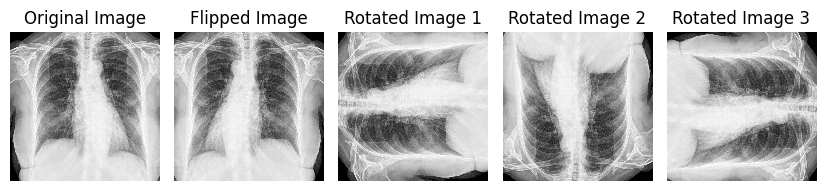

In [7]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
index = np.random.randint(0, x_train.shape[0])

original_image = augmented_images[index]

flipped_image = augmented_images[x_train.shape[0] + index]

rotated_images = []
for angle in rotation_angles:
    rotated_image = augmented_images[2 * x_train.shape[0] + index * len(rotation_angles) + (angle // 90 - 1)]
    rotated_images.append(rotated_image)

num_subplots = len(rotated_images) + 2

plt.figure(figsize=(10, 10))

plt.subplot(1, (num_subplots + 1), 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, (num_subplots + 1), 2)
plt.imshow(flipped_image)
plt.title('Flipped Image')
plt.axis('off')

for i, rotated_image in enumerate(rotated_images):
    plt.subplot(1, (num_subplots + 1), i + 3)
    plt.imshow(rotated_image)
    plt.title(f'Rotated Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
x_train = augmented_images
y_train = augmented_labels

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


##### Part 3-3

In [11]:
Model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding="same", input_shape=(150,150,3)),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Dropout(0.2, seed=10),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Dropout(0.2, seed=20),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Dropout(0.2, seed=30),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Dropout(0.2, seed=40),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Dropout(0.2, seed=50),
    keras.layers.Conv2D(filters=256, kernel_size=3,padding="same", activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Dropout(0.2, seed=60),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(axis = -1),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [14]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
Model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization_7 (Batc  (None, 150, 150, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 batch_normalization_8 (Batc  (None, 75, 75, 64)      

Epoch 1/30
23/23 [==============================] - 8s 130ms/step - loss: 0.7193 - accuracy: 0.7838 - val_loss: 630.3842 - val_accuracy: 0.5297
Epoch 2/30
23/23 [==============================] - 2s 87ms/step - loss: 0.1389 - accuracy: 0.9459 - val_loss: 182.4432 - val_accuracy: 0.5297
Epoch 3/30
23/23 [==============================] - 2s 87ms/step - loss: 0.1506 - accuracy: 0.9405 - val_loss: 30.0489 - val_accuracy: 0.5297
Epoch 4/30
23/23 [==============================] - 2s 87ms/step - loss: 0.1332 - accuracy: 0.9441 - val_loss: 4.8893 - val_accuracy: 0.5892
Epoch 5/30
23/23 [==============================] - 2s 88ms/step - loss: 0.1026 - accuracy: 0.9676 - val_loss: 5.8720 - val_accuracy: 0.5892
Epoch 6/30
23/23 [==============================] - 2s 87ms/step - loss: 0.0640 - accuracy: 0.9730 - val_loss: 7.8854 - val_accuracy: 0.5297
Epoch 7/30
23/23 [==============================] - 2s 88ms/step - loss: 0.1579 - accuracy: 0.9423 - val_loss: 1.5774 - val_accuracy: 0.6811
Epoch 8

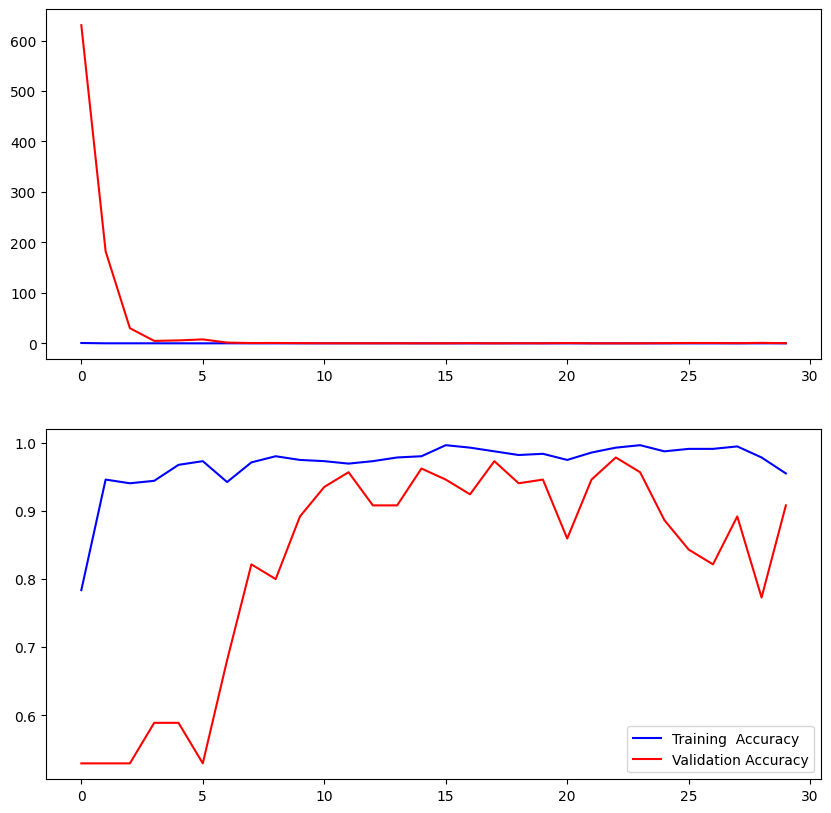

In [10]:
# from keras.callbacks import Callback

# class CustomCallback(Callback):
#     def __init__(self, min_epochs, desired_accuracy):
#         super(CustomCallback, self).__init__()
#         self.min_epochs = min_epochs
#         self.desired_accuracy = desired_accuracy

#     def on_epoch_end(self, epoch, logs=None):
#         if epoch >= self.min_epochs and logs['val_accuracy'] >= self.desired_accuracy:
#             self.model.stop_training = True
#             print(f"\nReached desired accuracy of {self.desired_accuracy} on validation set. Stopping training.")
# custom_callback = CustomCallback(min_epochs=5, desired_accuracy=0.97)
# keras.backend.clear_session()
Model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    batch_size=25,
    epochs=30,
    # callbacks=[custom_callback] 
)

Model.history.history.keys()
f,ax=plt.subplots(2,1,figsize=(10,10))

ax[0].plot(Model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(Model.history.history['val_loss'],color='r',label='Validation Loss')

ax[1].plot(Model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(Model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

##### Part 3-4

In [11]:
y_test = y_test.reshape((-1, 1))

results = Model.evaluate(x_test, y_test, verbose=0)
accuracy = results[1]

y_pred = Model.predict(x_test)

threshold = 0.5
y_hat = (y_pred > threshold).astype(int)

TP = tf.math.count_nonzero(y_hat * y_test)
TN = tf.math.count_nonzero((y_hat - 1) * (y_test - 1))
FP = tf.math.count_nonzero(y_hat * (y_test - 1))
FN = tf.math.count_nonzero((y_hat - 1) * y_test)

precision = TP / (TP + FP)
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

print("Accuracy:", accuracy)
print("Precision:", precision.numpy().item())
print("Specificity:", specificity.numpy().item())
print("Sensitivity:", sensitivity.numpy().item())
print("F1 Score:", f1_score.numpy().item())


2/2 [==============================] - 0s 18ms/step
Accuracy: 1.0
Precision: 1.0
Specificity: 1.0
Sensitivity: 1.0
F1 Score: 1.0


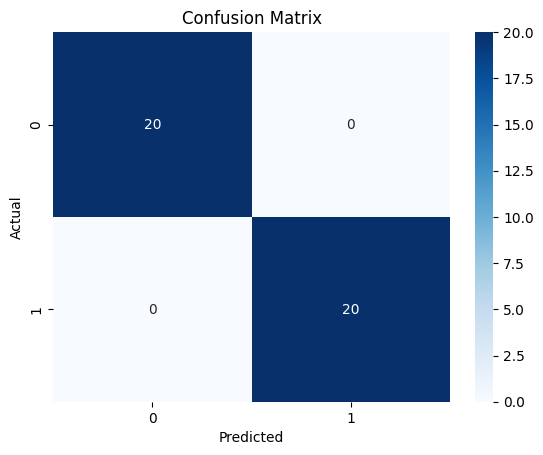

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_hat)

labels = np.unique(y_test)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

plt.title('Confusion matrix for AlexNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels)
plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels)

plt.show()

##### Part 3-5

In [8]:
model_5 = keras.models.Sequential([
keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding="same", input_shape=(150,150,3)),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=10),
keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=30),
keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=40),
keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=50),
keras.layers.Conv2D(filters=256, kernel_size=3,padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=60),
keras.layers.Flatten(),
keras.layers.Dense(512,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(256,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(1,activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)
model_5.fit(
x=x_train,
y=y_train,
validation_data=(x_val, y_val),
batch_size=25,
epochs=30
)

results = model_5.evaluate(x_test, y_test, verbose=0)
accuracy = results[1]
print(f"Accuracy with {5} Conv2D layers: {accuracy}")
    

Epoch 1/30
23/23 [==============================] - 11s 121ms/step - loss: 0.6470 - accuracy: 0.7874 - val_loss: 148.6213 - val_accuracy: 0.5297
Epoch 2/30
23/23 [==============================] - 2s 81ms/step - loss: 0.2158 - accuracy: 0.9279 - val_loss: 42.1005 - val_accuracy: 0.5297
Epoch 3/30
23/23 [==============================] - 2s 85ms/step - loss: 0.1795 - accuracy: 0.9351 - val_loss: 28.2151 - val_accuracy: 0.5297
Epoch 4/30
23/23 [==============================] - 2s 85ms/step - loss: 0.1569 - accuracy: 0.9568 - val_loss: 11.8168 - val_accuracy: 0.5297
Epoch 5/30
23/23 [==============================] - 2s 86ms/step - loss: 0.1352 - accuracy: 0.9532 - val_loss: 4.5150 - val_accuracy: 0.5946
Epoch 6/30
23/23 [==============================] - 2s 85ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 3.5424 - val_accuracy: 0.5676
Epoch 7/30
23/23 [==============================] - 2s 85ms/step - loss: 0.2450 - accuracy: 0.9279 - val_loss: 1.7275 - val_accuracy: 0.6973
Epoch 

In [9]:
model_4 = keras.models.Sequential([
keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding="same", input_shape=(150,150,3)),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=10),
keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=40),
keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=50),
keras.layers.Conv2D(filters=256, kernel_size=3,padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=60),
keras.layers.Flatten(),
keras.layers.Dense(512,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(256,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(1,activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)
model_4.fit(
x=x_train,
y=y_train,
validation_data=(x_val, y_val),
batch_size=25,
epochs=30
)

results = model_4.evaluate(x_test, y_test, verbose=0)
accuracy = results[1]
print(f"Accuracy with {4} Conv2D layers: {accuracy}")

Epoch 1/30
23/23 [==============================] - 5s 132ms/step - loss: 0.4931 - accuracy: 0.8505 - val_loss: 72.0239 - val_accuracy: 0.5297
Epoch 2/30
23/23 [==============================] - 2s 85ms/step - loss: 0.1594 - accuracy: 0.9387 - val_loss: 7.4792 - val_accuracy: 0.5459
Epoch 3/30
23/23 [==============================] - 2s 94ms/step - loss: 0.1760 - accuracy: 0.9279 - val_loss: 1.7554 - val_accuracy: 0.5459
Epoch 4/30
23/23 [==============================] - 2s 93ms/step - loss: 0.0918 - accuracy: 0.9676 - val_loss: 2.4126 - val_accuracy: 0.5405
Epoch 5/30
23/23 [==============================] - 2s 94ms/step - loss: 0.1298 - accuracy: 0.9459 - val_loss: 3.0353 - val_accuracy: 0.4919
Epoch 6/30
23/23 [==============================] - 2s 94ms/step - loss: 0.0932 - accuracy: 0.9640 - val_loss: 3.6316 - val_accuracy: 0.5730
Epoch 7/30
23/23 [==============================] - 2s 94ms/step - loss: 0.0511 - accuracy: 0.9802 - val_loss: 1.9545 - val_accuracy: 0.6649
Epoch 8/30


In [10]:
model_3 = keras.models.Sequential([
keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding="same", input_shape=(150,150,3)),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=10),
keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=50),
keras.layers.Conv2D(filters=256, kernel_size=3,padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=60),
keras.layers.Flatten(),
keras.layers.Dense(512,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(256,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(1,activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)
model_3.fit(
x=x_train,
y=y_train,
validation_data=(x_val, y_val),
batch_size=25,
epochs=30
)

results = model_3.evaluate(x_test, y_test, verbose=0)
accuracy = results[1]
print(f"Accuracy with {3} Conv2D layers: {accuracy}")

Epoch 1/30
23/23 [==============================] - 6s 121ms/step - loss: 0.6398 - accuracy: 0.8126 - val_loss: 20.6991 - val_accuracy: 0.4811
Epoch 2/30
23/23 [==============================] - 2s 85ms/step - loss: 0.1976 - accuracy: 0.9333 - val_loss: 6.7668 - val_accuracy: 0.5297
Epoch 3/30
23/23 [==============================] - 2s 85ms/step - loss: 0.0824 - accuracy: 0.9712 - val_loss: 9.8682 - val_accuracy: 0.5297
Epoch 4/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0667 - accuracy: 0.9748 - val_loss: 5.3649 - val_accuracy: 0.5351
Epoch 5/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0798 - accuracy: 0.9730 - val_loss: 3.0607 - val_accuracy: 0.5459
Epoch 6/30
23/23 [==============================] - 2s 84ms/step - loss: 0.0395 - accuracy: 0.9892 - val_loss: 2.0510 - val_accuracy: 0.5838
Epoch 7/30
23/23 [==============================] - 2s 85ms/step - loss: 0.1122 - accuracy: 0.9568 - val_loss: 1.0657 - val_accuracy: 0.7351
Epoch 8/30


In [2]:
model_2 = keras.models.Sequential([
keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding="same", input_shape=(150,150,3)),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=10),
keras.layers.Conv2D(filters=256, kernel_size=3,padding="same", activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=60),
keras.layers.Flatten(),
keras.layers.Dense(512,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(256,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(1,activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)
model_2.fit(
x=x_train,
y=y_train,
validation_data=(x_val, y_val),
batch_size=25,
epochs=30
)

results = model_2.evaluate(x_test, y_test, verbose=0)
accuracy = results[1]
print(f"Accuracy with {2} Conv2D layers: {accuracy}")

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]

In [3]:
model_1 = keras.models.Sequential([
keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding="same", input_shape=(150,150,3)),
keras.layers.BatchNormalization(axis = -1),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Dropout(0.2, seed=10),
keras.layers.Flatten(),
keras.layers.Dense(512,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(256,activation='relu'),
keras.layers.BatchNormalization(axis = -1),
keras.layers.Dense(1,activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8
)
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=['accuracy']
)
model_1.fit(
x=x_train,
y=y_train,
validation_data=(x_val, y_val),
batch_size=25,
epochs=30
)

results = model_1.evaluate(x_test, y_test, verbose=0)
accuracy = results[1]
print(f"Accuracy with {1} Conv2D layers: {accuracy}")

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[360000,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]